In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Bad Money,1999
1,Setan budeg,2009
2,Anna,2015
3,Behind the Mask,1917
4,L'assassino del corriere di Lione,1916


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [6]:
t = titles
t.head()

,title,year
0,Bad Money,1999
1,Setan budeg,2009
2,Anna,2015
3,Behind the Mask,1917
4,L'assassino del corriere di Lione,1916


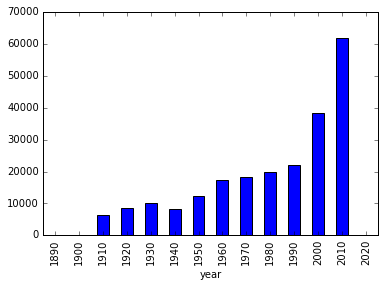

In [17]:
t.groupby([t.year//10*10]).size().plot(kind = 'bar')


### Use groupby() to plot the number of "Hamlet" films made each decade.

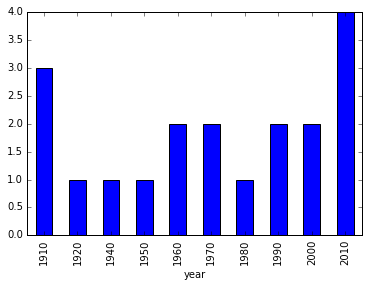

In [27]:
t[t.title == 'Hamlet'].groupby([t.year//10*10]).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

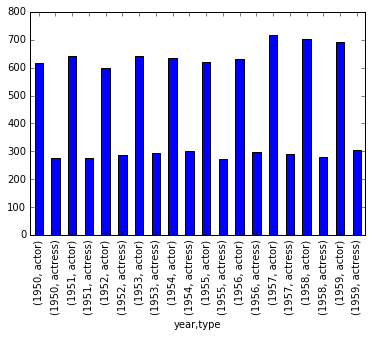

In [38]:
c = cast
c[(c.year//10 == 195) & (c.n == 1)].groupby(['year','type']).size().plot(kind = 'bar')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

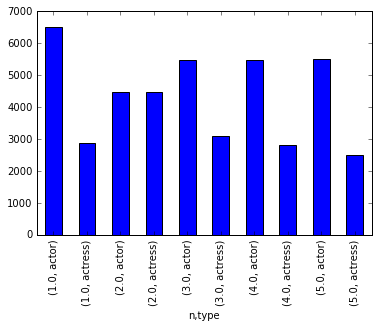

In [47]:
c[(c.year//10 == 195) & (c.n >= 1) & (c.n <= 5)].groupby(['n','type']).size().plot(kind = 'bar')

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [56]:
c[c.title == 'The Pink Panther'].groupby(['year']).size()

year
1963    19
2006    89
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [75]:
foRoles = c[c.name == 'Frank Oz'].sort_values('year').groupby(['year', 'title']).size()
fo = foRoles[foRoles > 1]
fo

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

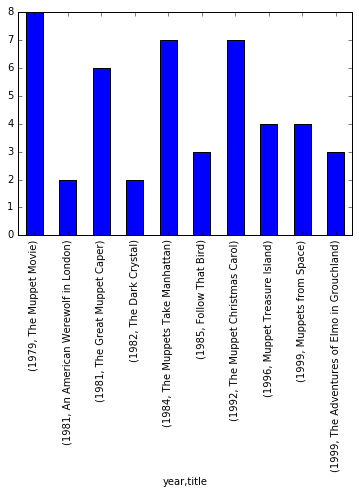

In [76]:
fo.plot(kind = 'bar')

### List each of the characters that Frank Oz has portrayed at least twice.

In [85]:
foRoles = c[c.name == 'Frank Oz'].sort_values('character').groupby(['character']).size()
f0 = foRoles[foRoles >= 2]
f0

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

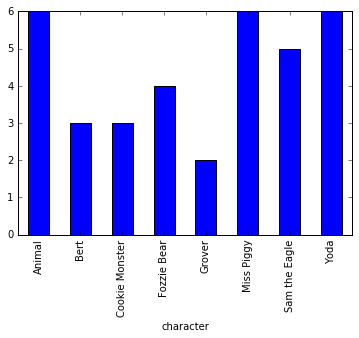

In [86]:
f0.plot(kind = 'bar')